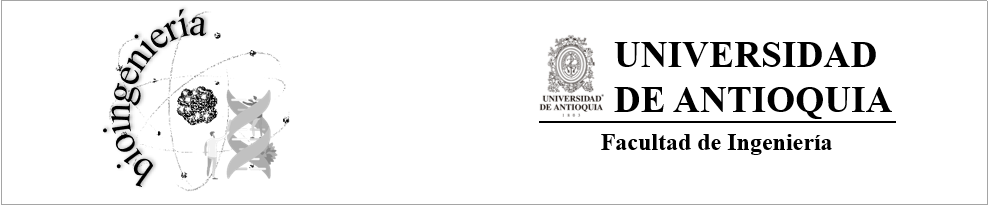

# **ÁLBOL DE DECISIÓN**

Los árboles de decisión son una técnica de aprendizaje automático supervisado muy utilizada en muchos campos del ML. Como su nombre indica, el _Árbol de Decisión_ toma una serie de decisiones en forma de árbol. Los nodos intermedios (las ramas) representan soluciones. Los nodos finales (las hojas) nos dan la predicción que vamos buscando.

Este algoritmo de ML puede usarse tanto para problemas de <a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html" target="_blank">Clasificación</a> como para problemas de <a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html" target="_blank">Regresión</a>.



## Problema de Clasificación

Usaremos la base de datos <a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html" target="_blank">iris</a>. El problema consiste en clasificar correctamente la variedad de la flor _iris_ a partir del ancho y largo de los pétalos y sépalos. Hay tres variedades de flor iris: setosa, versicolor y virginica.

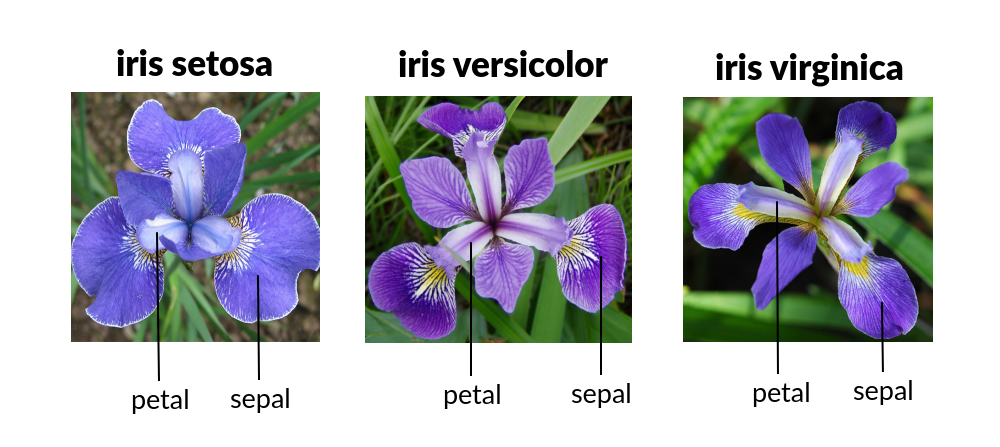

Este conjunto de datos tiene 150 muestras:

* 50 iris setosa
* 50 iris versicolor
* 50 iris virginica

### Importación de los módulos a utilizar

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Carga del Conjunto de Datos desde scikit-learn

In [3]:
dataset = load_iris()
dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

Contenido del conjunto de datos

In [5]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Características (features) del conjuto de datos

In [6]:
dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## Exploración de los datos

In [7]:
data_ = dataset.data
data_

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

Histogramas por característica (feature)

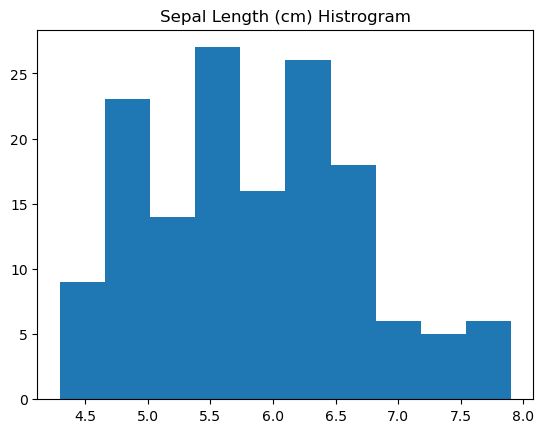

In [8]:
plt.hist(data_[:,0])
plt.title('Sepal Length (cm) Histrogram')
plt.show()

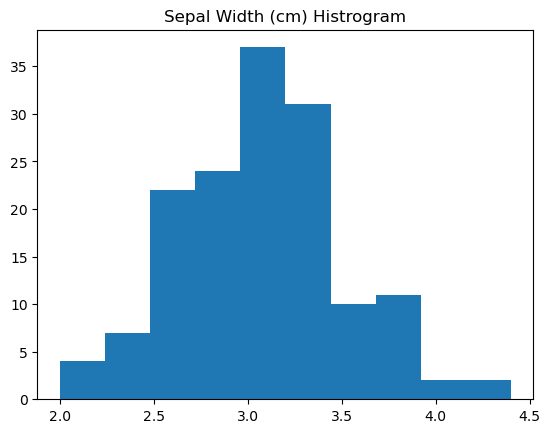

In [9]:
plt.hist(data_[:,1])
plt.title('Sepal Width (cm) Histrogram')
plt.show()

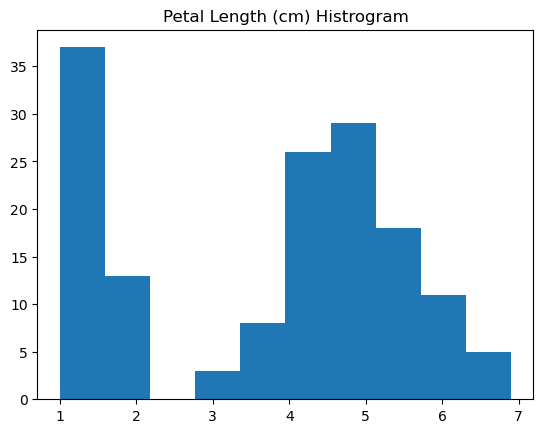

In [10]:
plt.hist(data_[:,2])
plt.title('Petal Length (cm) Histrogram')
plt.show()

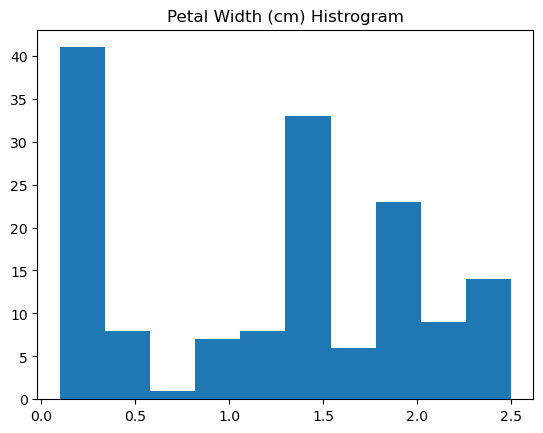

In [11]:
plt.hist(data_[:,3])
plt.title('Petal Width (cm) Histrogram')
plt.show()

## Carga de dataset desde archivo (.csv)
Para usar esta opción se deben usar librearías como _pandas_

In [ ]:
#https://github.com/angelower/infomed20251/blob/main/data/irisdb.csv

# !wget https://raw.githubusercontent.com/angelower/infomed20251/main/data/irisdb.csv
df = pd.read_csv("irisdb.csv")
df

--2025-05-08 13:16:45--  https://raw.githubusercontent.com/angelower/infomed20251/main/data/irisdb.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2685 (2.6K) [text/plain]
Saving to: ‘irisdb.csv’

irisdb.csv          100%[===================>]   2.62K  --.-KB/s    in 0s      

2025-05-08 13:16:46 (13.8 MB/s) - ‘irisdb.csv’ saved [2685/2685]



,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


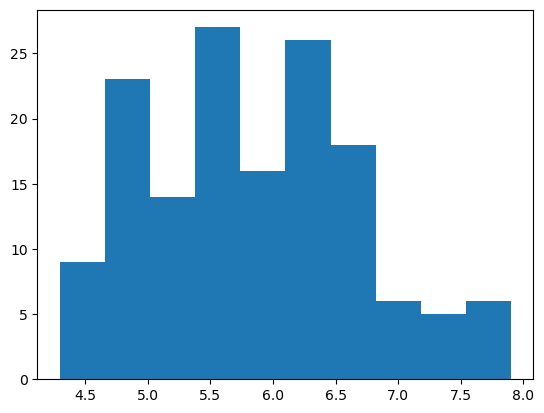

In [13]:
plt.hist(df.sepal_length)
plt.show()

# Clasificación de Iris con dos Caracteríticas (Sepal Length and Sepal Width) - 2D

In [14]:
X_train, X_test , y_train , y_test = train_test_split(data_[:,:2] , dataset.target , random_state=0)
print("Train dataset:",X_train.shape, y_train.shape)
print("Taset dataset:",X_test.shape, y_test.shape)

Train dataset: (112, 2) (112,)
Taset dataset: (38, 2) (38,)


In [15]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt.score(X_test,y_test)

0.631578947368421

Feature Importances: [0.7687509 0.2312491]


<BarContainer object of 2 artists>

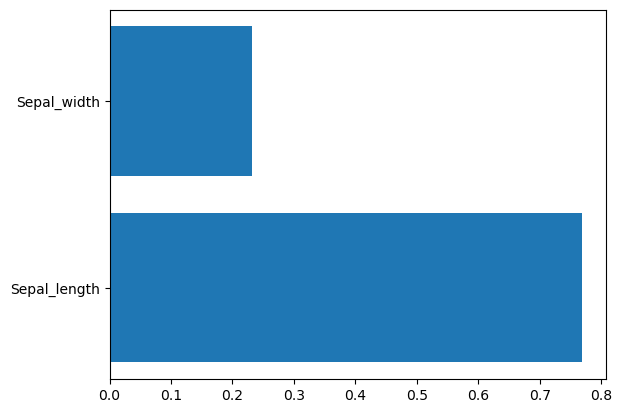

In [16]:
print('Feature Importances:', dt.feature_importances_)
plt.barh(['Sepal_length','Sepal_width'] , dt.feature_importances_ )

# Métricas

In [17]:
preds = dt.predict(X_test)
mat = confusion_matrix(y_test , preds)
mat

array([[13,  0,  0],
       [ 1,  8,  7],
       [ 0,  6,  3]])

### Accuracy

In [18]:
acc = accuracy_score(y_test , preds)
acc


0.631578947368421

### Precision

In [19]:
precision = np.diag(mat)/np.sum(mat,axis=1)
precision


array([1.        , 0.5       , 0.33333333])

### Recall

In [20]:
recall = np.diag(mat)/np.sum(mat , axis=0)
recall

array([0.92857143, 0.57142857, 0.3       ])

### F1 Score

In [21]:
F1 = 2*(precision*recall)/(precision+recall)
F1_inv = F1[::-1]
F1

array([0.96296296, 0.53333333, 0.31578947])

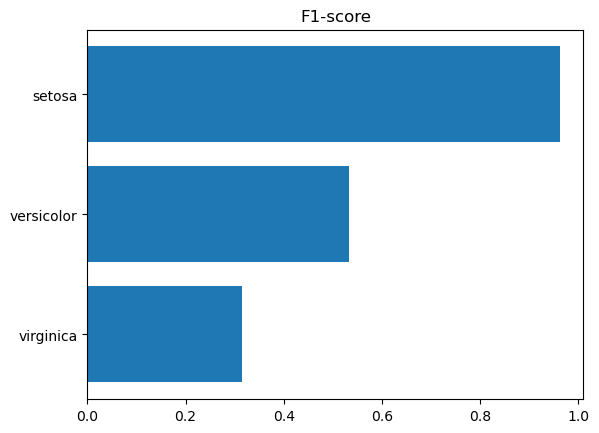

In [22]:
fig = plt.figure(u'Gráfica de barras') # Figure
ax = fig.add_subplot() # Axes

nam_classes = ['setosa', 'versicolor' , 'virginica']
nom_inv = nam_classes
nom_inv.reverse()
datos = F1_inv
xx = range(len(datos))

ax.set_title('F1-score')
ax.barh(xx, datos, align='center')
ax.set_yticks(xx)
ax.set_yticklabels(nom_inv)

plt.show()

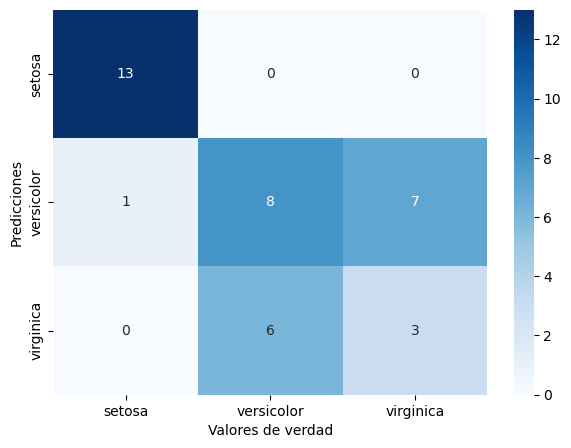

In [23]:
import seaborn as sns

labels = ['setosa', 'versicolor' , 'virginica']
cm = confusion_matrix(y_test , preds)
fig , ax = plt.subplots(figsize=(7,5))
sns.heatmap(cm ,cmap='Blues',annot=True , xticklabels=labels, yticklabels=labels)
plt.xlabel('Valores de verdad')
plt.ylabel('Predicciones')
plt.show()

# Clasificación de Iris con tres Caracteríticas (Sepal Length, Sepal Width y Petal Length) - 3D

In [24]:
X_train, X_test , y_train , y_test = train_test_split(data_[:,:3] , dataset.target)
print("Train dataset:",X_train.shape, y_train.shape)
print("Taset dataset:",X_test.shape, y_test.shape)

Train dataset: (112, 3) (112,)
Taset dataset: (38, 3) (38,)


In [25]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt.score(X_test,y_test)

0.9473684210526315

Feature Importances: [0.04235945 0.05924501 0.89839553]


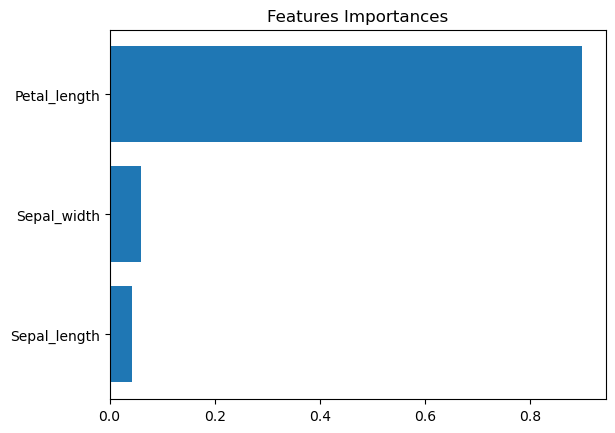

In [26]:
print('Feature Importances:',dt.feature_importances_)
plt.barh(['Sepal_length','Sepal_width' , 'Petal_length'] , dt.feature_importances_ )
plt.title('Features Importances')
plt.show()

## Métricas

In [27]:
preds = dt.predict(X_test)
mat = confusion_matrix(y_test , preds)

print("Accuracy: \t", accuracy_score(y_test , preds))

precision = np.diag(mat)/np.sum(mat,axis=1)
print("Precision: \t", precision)

recall = np.diag(mat)/np.sum(mat , axis=0)
print("Recall: \t", recall)

F1 = 2*(precision*recall)/(precision+recall)
F1_inv = F1[::-1]
print("F1 Score: \t",F1)


Accuracy: 	 0.9473684210526315
Precision: 	 [1.         0.88888889 0.90909091]
Recall: 	 [1.         0.88888889 0.90909091]
F1 Score: 	 [1.         0.88888889 0.90909091]


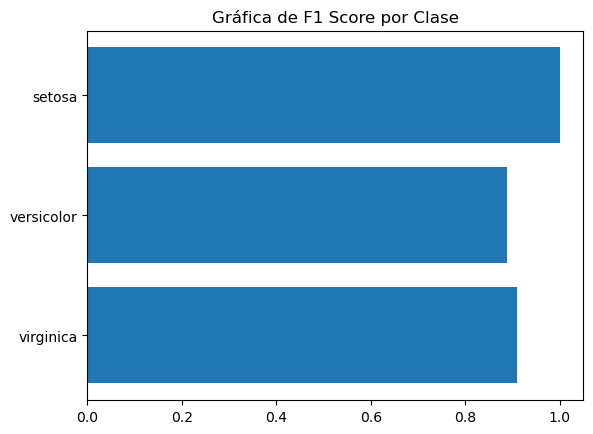

In [28]:
nam_classes = ['setosa', 'versicolor' , 'virginica']
nom_inv = nam_classes
nom_inv.reverse()
datos = F1_inv
plt.barh(nam_classes, datos, align='center')
plt.title("Gráfica de F1 Score por Clase")
plt.show()

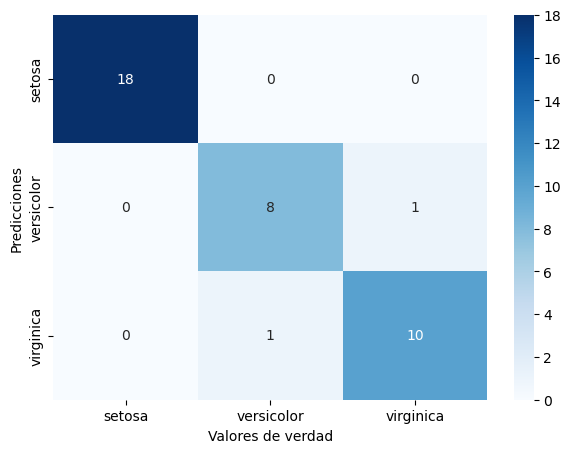

In [29]:
import seaborn as sns

labels = ['setosa', 'versicolor' , 'virginica']
cm = confusion_matrix(y_test , preds)
fig , ax = plt.subplots(figsize=(7,5))
sns.heatmap(cm ,cmap='Blues',annot=True , xticklabels=labels, yticklabels=labels)
plt.xlabel('Valores de verdad')
plt.ylabel('Predicciones')
plt.show()

# Ejercicio
Hacer el mismo proceso de entrenamiento y prueba con las respectivas métricas.

# Cross Validation

In [30]:
from sklearn.model_selection import KFold,cross_val_score

In [31]:
cross_val_score(dt, data_[:,:3], dataset.target, cv=5)

array([0.96666667, 1.        , 0.9       , 0.96666667, 0.86666667])

# Cross Validation used KFolds

In [32]:
seed=5

kfold = KFold(n_splits=5, shuffle=True , random_state=seed)
cvscores_test = []
cvscores_train = []
X = data_[:,:3]
y = dataset.target
i=0
for train, test in kfold.split(X, y):
    i+=1
    #print(train)
    X_train_ = X[train]
    y_train_ = y[train]

    X_test_ = X[test]
    y_test_ = y[test]

    dt = DecisionTreeClassifier()
    dt.fit(X_train_ , y_train_)

    print("Accuracy folds: %d" % i)
    scores_train = dt.score(X_train_, y_train_)
    print("Train: %.2f%%" % (scores_train*100))
    cvscores_train.append(scores_train * 100)

    scores_test = dt.score(X_test_, y_test_)
    print("Test: %.2f%% " % (scores_test*100))
    cvscores_test.append(scores_test * 100)

print("Mean train accuracy: %.2f%% (+/- %.2f%%)" % (np.mean(cvscores_train), np.std(cvscores_train)))
print("Mean test accuracy: %.2f%% (+/- %.2f%%)" % (np.mean(cvscores_test), np.std(cvscores_test)))

Accuracy folds: 1
Train: 100.00%
Test: 86.67% 
Accuracy folds: 2
Train: 100.00%
Test: 93.33% 
Accuracy folds: 3
Train: 100.00%
Test: 90.00% 
Accuracy folds: 4
Train: 100.00%
Test: 96.67% 
Accuracy folds: 5
Train: 100.00%
Test: 96.67% 
Mean train accuracy: 100.00% (+/- 0.00%)
Mean test accuracy: 92.67% (+/- 3.89%)


# GridSearch

In [33]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':[ None, 1, 3 , 5 , 10 , 20] , 'criterion':["gini", "entropy"]}
dt = DecisionTreeClassifier(random_state=42)
clf = GridSearchCV(dt, parameters , cv=5 , verbose=3 , return_train_score=True)
clf.fit(X_train, y_train)
clf.best_estimator_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END criterion=gini, max_depth=None;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=None;, score=(train=1.000, test=0.957) total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=None;, score=(train=1.000, test=0.864) total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=None;, score=(train=1.000, test=0.955) total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=None;, score=(train=1.000, test=0.864) total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1;, score=(train=0.652, test=0.652) total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1;, score=(train=0.652, test=0.652) total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1;, score=(train=0.644, test=0.682) total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1;, score=(train=0.656, test=0.636) total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1;, score=(train=0.656, test=0.636) tot

DecisionTreeClassifier(random_state=42)

In [34]:
clf.best_params_

{'criterion': 'gini', 'max_depth': None}

## Graficar el árbol

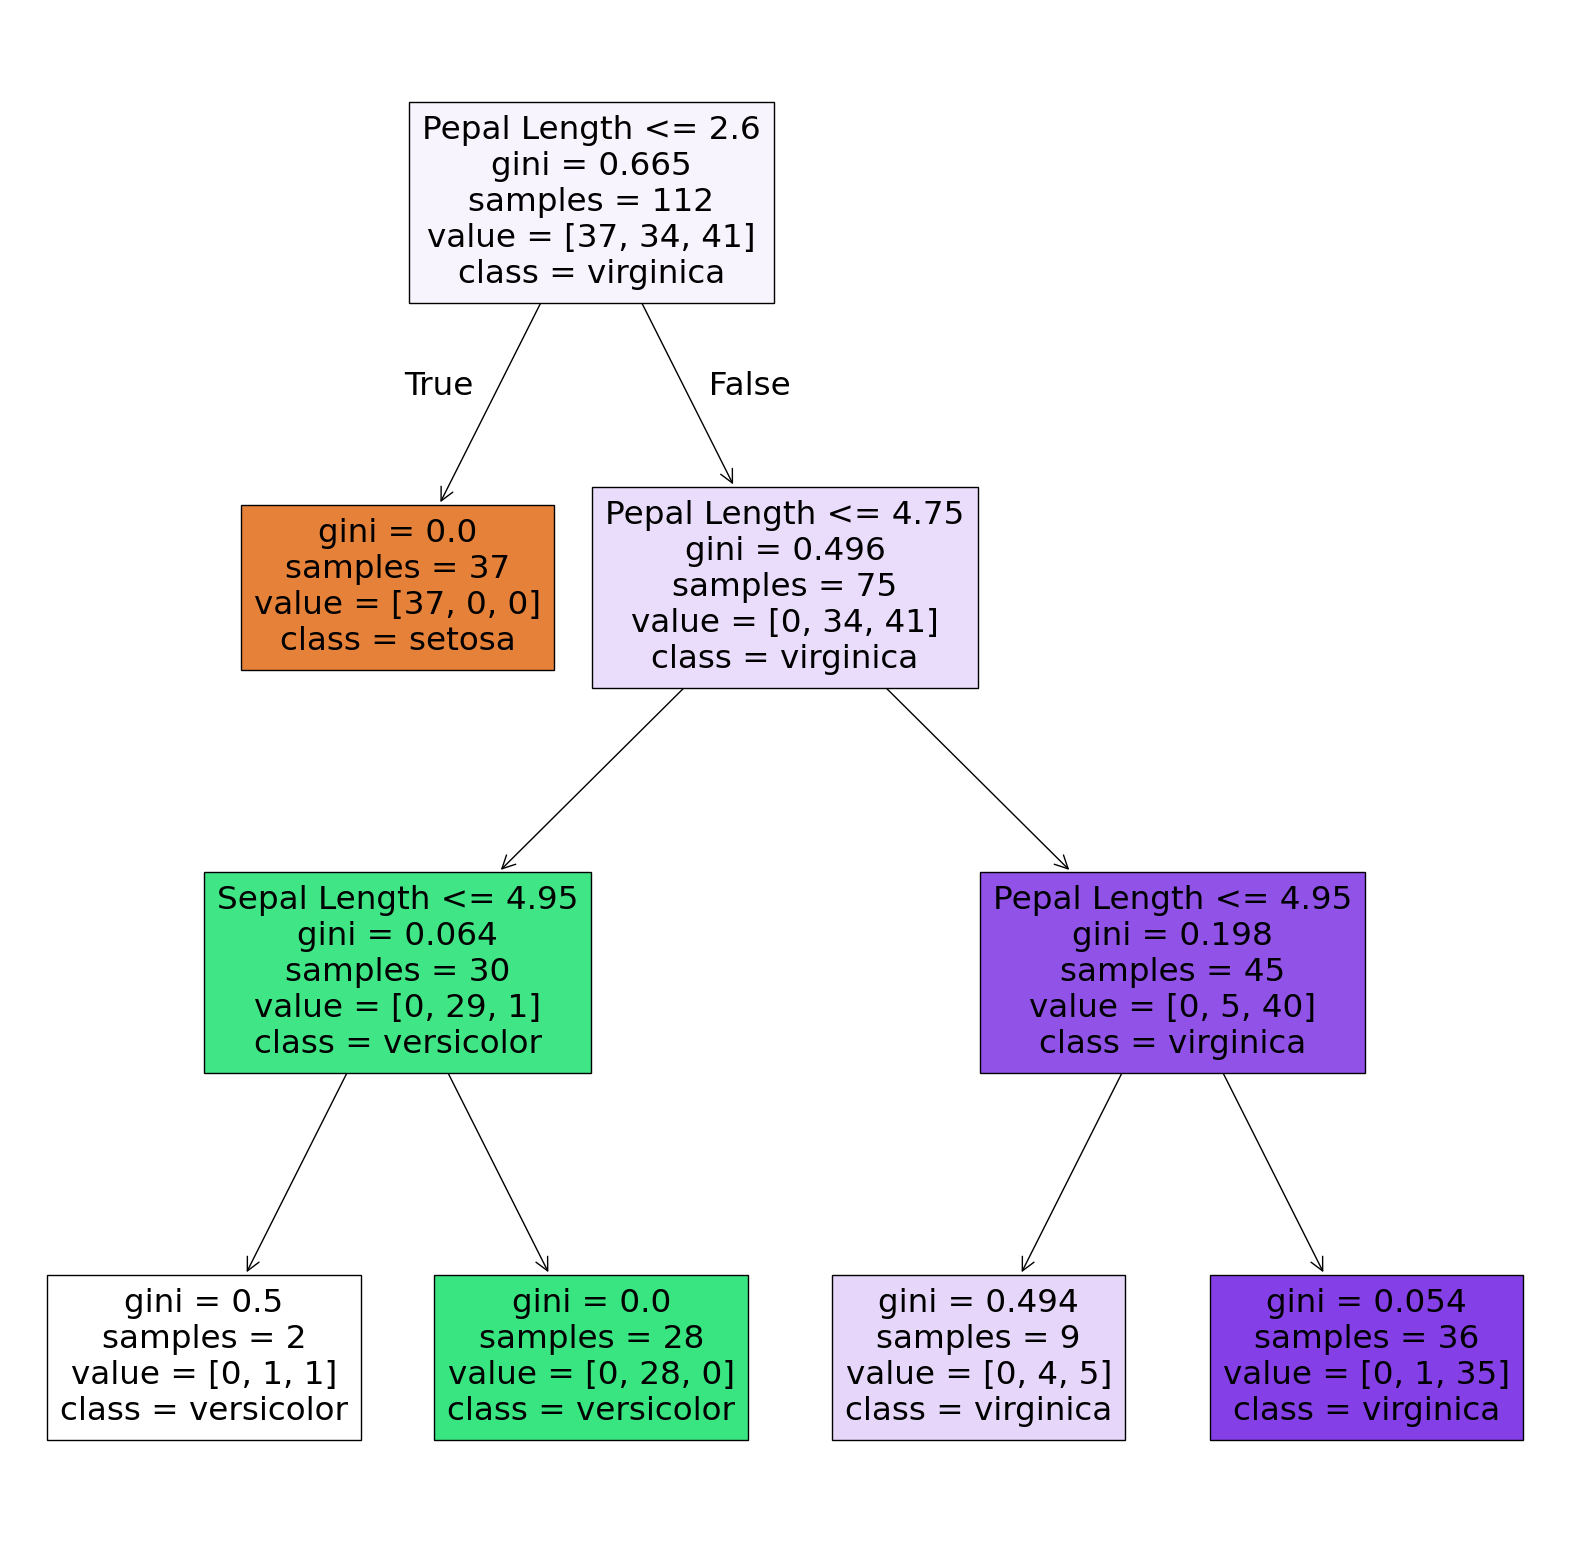

In [35]:
X_train, X_test , y_train , y_test = train_test_split(data_[:,:3] , dataset.target , random_state=1)
dt = DecisionTreeClassifier(max_depth = 3)
dt.fit(X_train,y_train)

plt.figure(figsize=[20,20])
plot_tree(dt , filled=True , class_names=['setosa', 'versicolor' , 'virginica'] ,
         feature_names = ['Sepal Length', 'Sepal Width','Pepal Length'])
plt.show()

# Clasificación en 2D

#### Sepal Width vs Sepal Length

/var/folders/bg/03wfj9sn3rl6v7f84vn0q_pc0000gn/T/ipykernel_2735/4042041608.py:28: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=dataset.target_names[i],


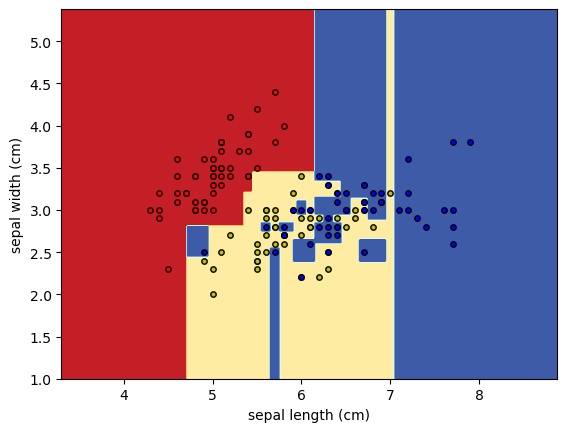

In [37]:
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

X = dataset.data[:, [0,1]]
y = dataset.target

# Train
clf = DecisionTreeClassifier().fit(X, y)


x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

plt.xlabel(dataset.feature_names[0])
plt.ylabel(dataset.feature_names[1])

# Plot the training points
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=dataset.target_names[i],
                cmap=plt.cm.RdYlBu, edgecolor='black', s=15)
    
plt.show()

# Problema de Regresión

Usar la base de datos de las casas de Bostón ([boston house-prices dataset](https://scikit-learn.org/0.15/modules/generated/sklearn.datasets.load_boston.html)) para implementar el árbol de regresión para problemas de regresión.

In [38]:
# import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# dataset load
# https://github.com/angelower/infomed20251/blob/main/data/housing.csv

# !wget https://raw.githubusercontent.com/angelower/infomed20251/main/data/housing.csv
dataset = pd.read_csv('housing.csv' , delimiter=";")
dataset

--2025-05-08 13:47:51--  https://raw.githubusercontent.com/angelower/infomed20251/main/data/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41359 (40K) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]  40.39K  96.5KB/s    in 0.4s    

2025-05-08 13:47:51 (96.5 KB/s) - ‘housing.csv’ saved [41359/41359]



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [40]:
X = dataset.loc[: , ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
y = dataset.loc[: , ['MEDV']]

print(X.shape , y.shape)

(506, 13) (506, 1)


In [41]:
# split into training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0) # 20% for testing dataset
print("Train: ", X_train.shape , y_train.shape)
print("Test: ", X_test.shape , y_test.shape)

Train:  (404, 13) (404, 1)
Test:  (102, 13) (102, 1)


In [42]:
# fit the Decision tree regression to the dataset
from sklearn.tree import DecisionTreeRegressor, plot_tree
regressor = DecisionTreeRegressor(random_state=0) #set the random seed value
regressor.fit(X_train, y_train)
print("Train score: ", regressor.score( X_train , y_train))
print("Test score: ", regressor.score(X_test , y_test))


Train score:  1.0
Test score:  0.5399075768275765


In [43]:
preds = regressor.predict(X_test)
preds

array([23.7, 20.8, 18.5,  9.6, 21.2, 21.8, 20.7, 19.5, 22. , 16.1,  7.2,
       17.2, 14.2,  8.8, 48.5, 37. , 21.2, 34.6, 24.1, 21.8, 24.7, 15.3,
       21.4, 24.7, 18.5, 10.9, 14.5, 15.6, 39.8, 20.4, 12.5, 19.5, 18.9,
       22.2, 20.3, 19.9,  7. , 20.2, 12.5, 17.2, 25. , 18.5, 22.2, 12.5,
       20.1, 18.2, 22.4, 15.6, 13.4, 22.8, 19. , 16.2, 19.3, 21.9, 15.6,
       18.5, 19.3, 17.5, 10.9, 22.4, 20.6, 22.2, 32.2, 24.1, 21.1, 24.1,
       17.4, 27.1, 16.3, 21.7, 24.4, 26.4, 24.8, 30.5, 25. ,  7.2, 41.7,
       22.9, 23.1, 19.3, 30.1, 19.2, 15.3, 41.7, 41.7, 25. , 22.4, 13.8,
       24.3, 13.8, 17.4, 11.8, 20.6, 29.9, 21.1, 22. , 11.9, 22.9, 12.7,
       18.5, 25. , 20.1])

In [44]:
np.array(y_test.MEDV)

array([22.6, 50. , 23. ,  8.3, 21.2, 19.9, 20.6, 18.7, 16.1, 18.6,  8.8,
       17.2, 14.9, 10.5, 50. , 29. , 23. , 33.3, 29.4, 21. , 23.8, 19.1,
       20.4, 29.1, 19.3, 23.1, 19.6, 19.4, 38.7, 18.7, 14.6, 20. , 20.5,
       20.1, 23.6, 16.8,  5.6, 50. , 14.5, 13.3, 23.9, 20. , 19.8, 13.8,
       16.5, 21.6, 20.3, 17. , 11.8, 27.5, 15.6, 23.1, 24.3, 42.8, 15.6,
       21.7, 17.1, 17.2, 15. , 21.7, 18.6, 21. , 33.1, 31.5, 20.1, 29.8,
       15.2, 15. , 27.5, 22.6, 20. , 21.4, 23.5, 31.2, 23.7,  7.4, 48.3,
       24.4, 22.6, 18.3, 23.3, 17.1, 27.9, 44.8, 50. , 23. , 21.4, 10.2,
       23.3, 23.2, 18.9, 13.4, 21.9, 24.8, 11.9, 24.3, 13.8, 24.7, 14.1,
       18.7, 28.1, 19.8])

In [45]:
from sklearn.metrics import mean_squared_error , r2_score
print("MSE: ", mean_squared_error(y_test, preds))
print("R2 Score: ", r2_score(y_test, preds))


MSE:  37.46460784313726
R2 Score:  0.5399075768275765


# GridSearch

In [46]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':[ None, 1, 3 , 5 , 10 , 20] }
dt = DecisionTreeRegressor(random_state=0)
rgs = GridSearchCV(dt, parameters , cv=5 , verbose=3)
rgs.fit(X_train, y_train)
rgs.best_estimator_

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ....................max_depth=None;, score=0.852 total time=   0.0s
[CV 2/5] END ....................max_depth=None;, score=0.569 total time=   0.0s
[CV 3/5] END ....................max_depth=None;, score=0.871 total time=   0.0s
[CV 4/5] END ....................max_depth=None;, score=0.764 total time=   0.0s
[CV 5/5] END ....................max_depth=None;, score=0.873 total time=   0.0s
[CV 1/5] END .......................max_depth=1;, score=0.308 total time=   0.0s
[CV 2/5] END .......................max_depth=1;, score=0.331 total time=   0.0s
[CV 3/5] END .......................max_depth=1;, score=0.423 total time=   0.0s
[CV 4/5] END .......................max_depth=1;, score=0.314 total time=   0.0s
[CV 5/5] END .......................max_depth=1;, score=0.469 total time=   0.0s
[CV 1/5] END .......................max_depth=3;, score=0.793 total time=   0.0s
[CV 2/5] END .......................max_depth=3;,

DecisionTreeRegressor(max_depth=10, random_state=0)

# Graficar el árbol

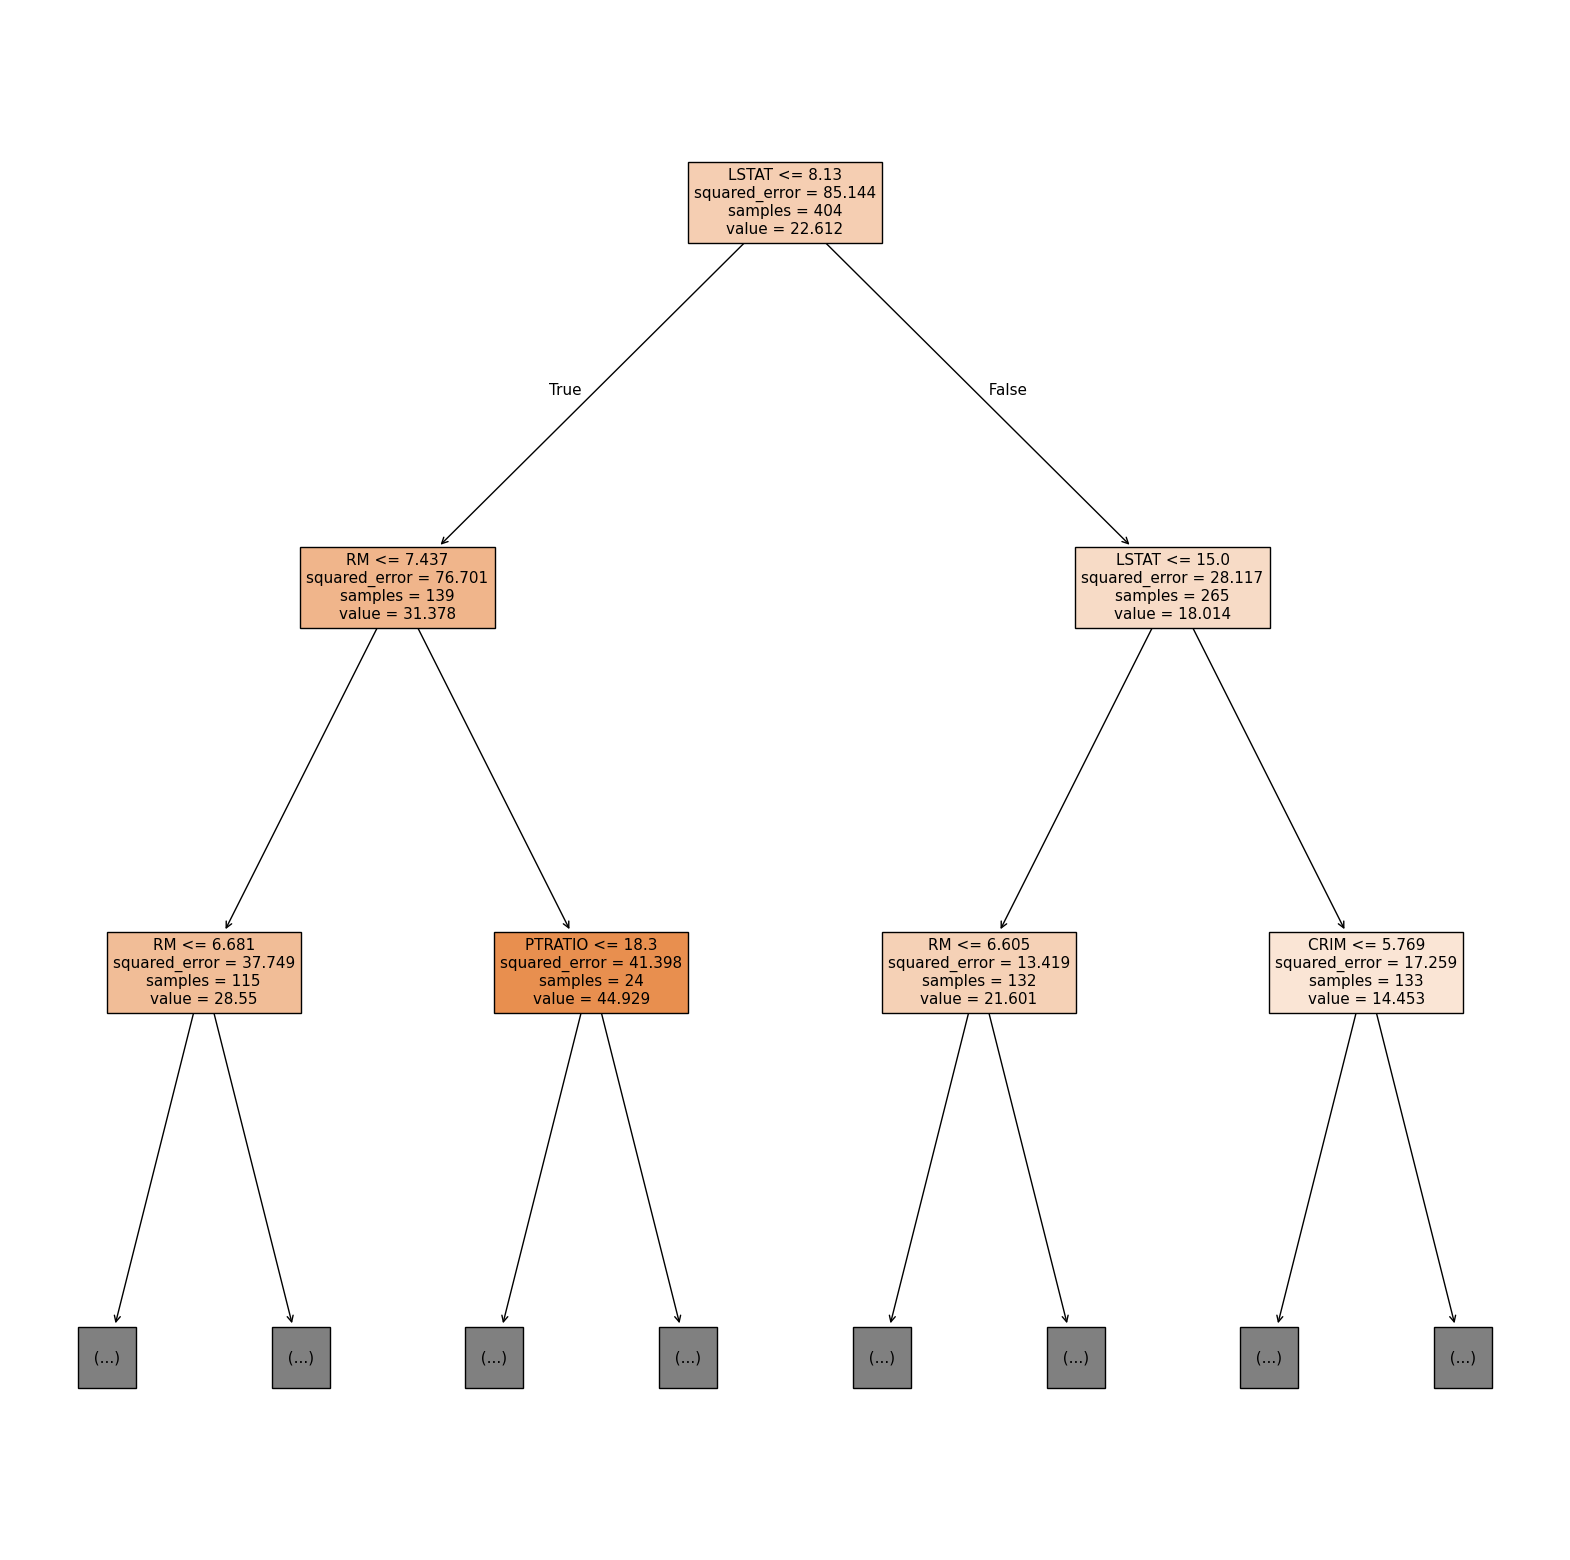

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0) # 20% for testing dataset
dt = DecisionTreeRegressor(max_depth=10, random_state=0)
dt.fit(X_train,y_train)

plt.figure(figsize=[20,20])
plot_tree(dt , filled=True , max_depth=2 , feature_names=list(X.keys()))
plt.show()

Feature Importances: [0.03056499 0.00072788 0.00876467 0.00090023 0.01563257 0.23409882
 0.00737618 0.0489785  0.00175013 0.01025659 0.0368203  0.00802758
 0.59610156]


<BarContainer object of 13 artists>

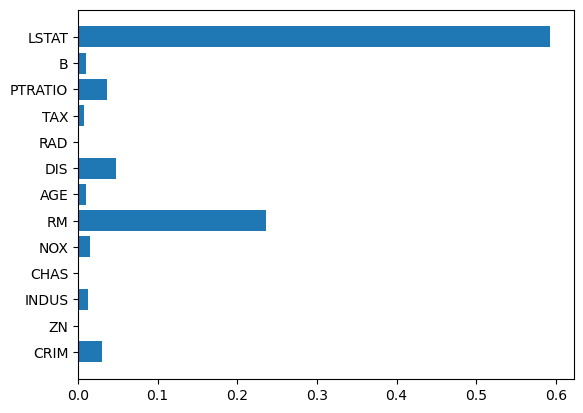

In [48]:
print('Feature Importances:',dt.feature_importances_)
plt.barh(list(X.keys()) , regressor.feature_importances_ )

#### DESCRIPCIÓN DE LA BASE DE DATOS

https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names